<a href="https://colab.research.google.com/github/Filburb/Filburb/blob/main/dt%2C%20knn%2C%20svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [11]:
file_path = 'data_balita.csv'
data = pd.read_csv(file_path)

In [12]:
print(data.isnull().sum())

Umur (bulan)         0
Jenis Kelamin        0
Tinggi Badan (cm)    0
Status Gizi          0
dtype: int64


In [13]:
label_encoder = LabelEncoder()
data['Jenis Kelamin'] = label_encoder.fit_transform(data['Jenis Kelamin'])
data['Status Gizi'] = label_encoder.fit_transform(data['Status Gizi'])

In [14]:
X = data[['Umur (bulan)', 'Jenis Kelamin', 'Tinggi Badan (cm)']]
y = data['Status Gizi']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
decision_tree = DecisionTreeClassifier(random_state=200)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=200)

In [17]:
y_pred = decision_tree.predict(X_test)

In [18]:
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

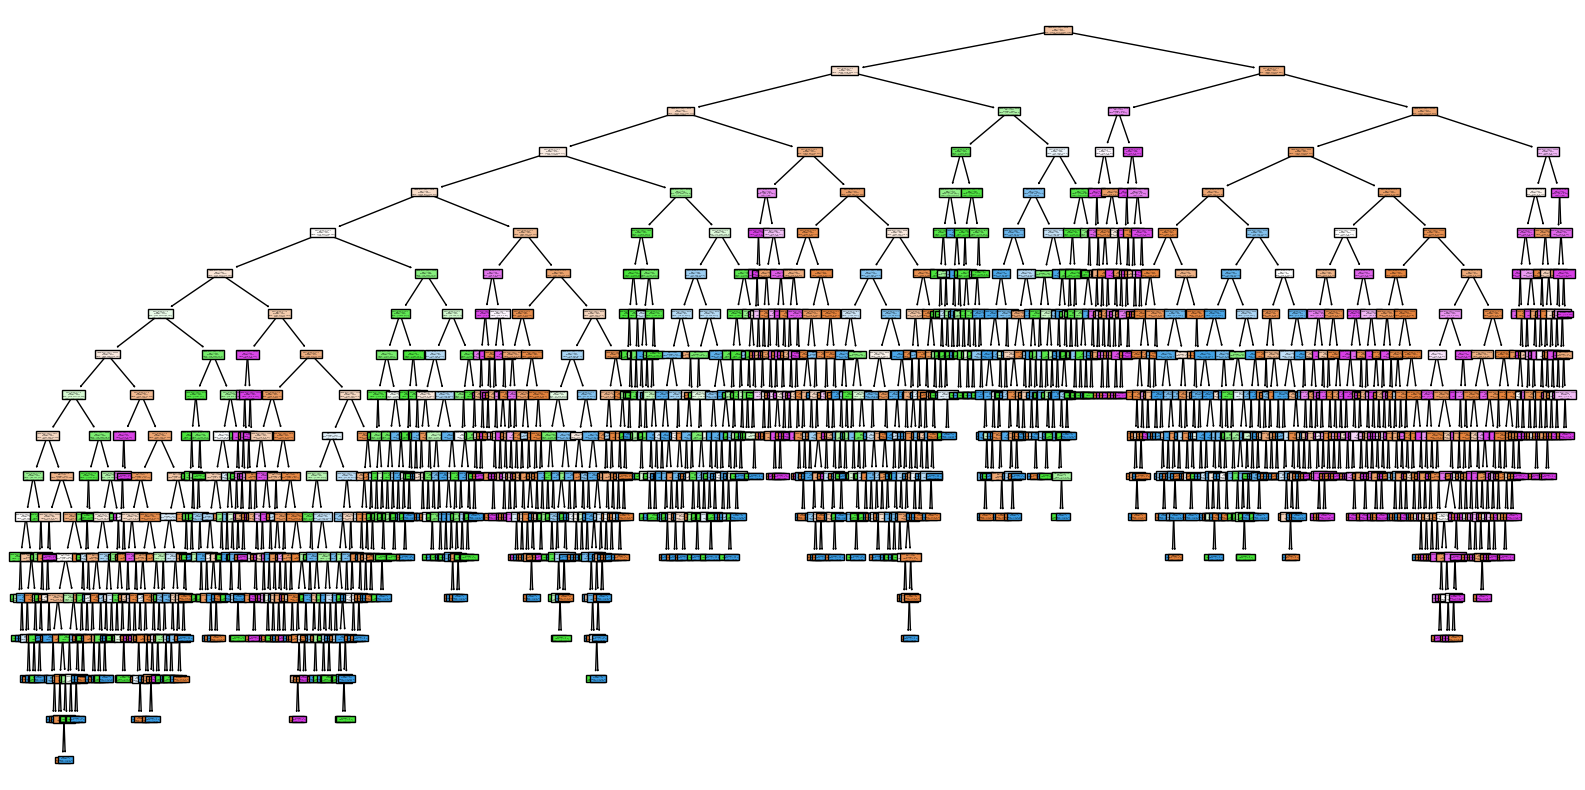

In [47]:
plt.figure(figsize=(20,10))
plot_tree(decision_tree, feature_names=X.columns, class_names=label_encoder.classes_, filled=True)
plt.show()

In [19]:
print(report)

                  precision    recall  f1-score   support

          normal       1.00      1.00      1.00     13382
severely stunted       1.00      1.00      1.00      4130
         stunted       1.00      1.00      1.00      2790
          tinggi       1.00      1.00      1.00      3898

        accuracy                           1.00     24200
       macro avg       1.00      1.00      1.00     24200
    weighted avg       1.00      1.00      1.00     24200



In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [22]:
y_pred_knn = knn.predict(X_test)

In [48]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(title)
    plt.show()

In [23]:
report_knn = classification_report(y_test, y_pred_knn, target_names=label_encoder.classes_)

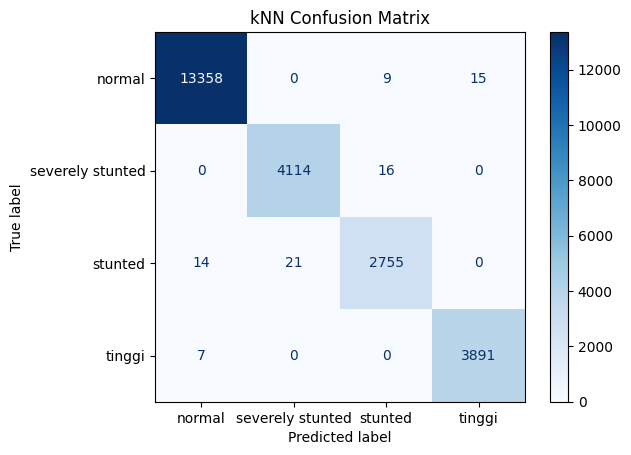

In [49]:
plot_confusion_matrix(y_test, y_pred_knn, "kNN Confusion Matrix")


In [24]:
print("kNN Classification Report:\n", report_knn)

kNN Classification Report:
                   precision    recall  f1-score   support

          normal       1.00      1.00      1.00     13382
severely stunted       0.99      1.00      1.00      4130
         stunted       0.99      0.99      0.99      2790
          tinggi       1.00      1.00      1.00      3898

        accuracy                           1.00     24200
       macro avg       1.00      0.99      1.00     24200
    weighted avg       1.00      1.00      1.00     24200



In [25]:
from sklearn.svm import SVC

In [26]:
svm = SVC(random_state=42)
svm.fit(X_train, y_train)

SVC(random_state=42)

In [27]:
y_pred_svm = svm.predict(X_test)

In [28]:
report_svm = classification_report(y_test, y_pred_svm, target_names=label_encoder.classes_)

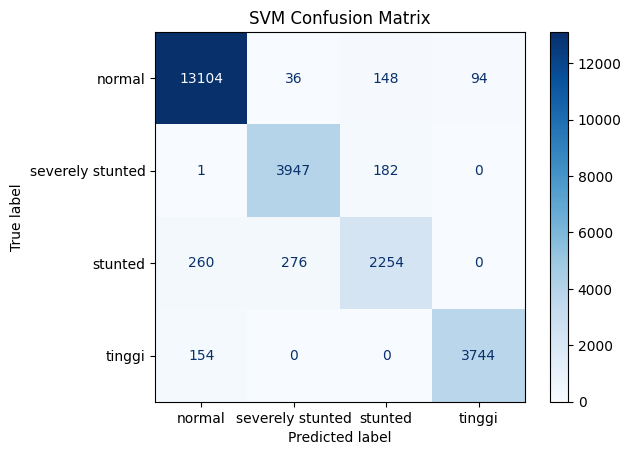

In [50]:
plot_confusion_matrix(y_test, y_pred_svm, "SVM Confusion Matrix")

In [29]:
print("SVM Classification Report:\n", report_svm)

SVM Classification Report:
                   precision    recall  f1-score   support

          normal       0.97      0.98      0.97     13382
severely stunted       0.93      0.96      0.94      4130
         stunted       0.87      0.81      0.84      2790
          tinggi       0.98      0.96      0.97      3898

        accuracy                           0.95     24200
       macro avg       0.94      0.93      0.93     24200
    weighted avg       0.95      0.95      0.95     24200

